## Filtering

- Load a signal from .dat file
- Apply different filters 
- Plot the resulting filtered signals

In [1]:
from helpersmd import fourierTransform
import numpy as np
from plotmd import plotVector
from helpersmd import getScaledDomain
import matplotlib.pyplot as plt
from helpersmd import readFloatFromDat,readFromDat
from helpersmd import lpf,hpf,bpf,bsf
from helpersmd import convolution

In [2]:
def plotHelper(xn,Xn,fn,Fn,yn,Yn,dt,filter_name):
    fscaled1=getScaledDomain(dt=dt,N=xn.shape[0])[:Xn.shape[0]]
    fscaled2=getScaledDomain(dt=dt,N=fn.shape[0])[:Fn.shape[0]]
    fscaled3=getScaledDomain(dt=dt,N=yn.shape[0])[:Yn.shape[0]]
    
    plt.figure(figsize=(12, 12), dpi=80)
    plt.subplot(321)
    plotVector(xn,"time domain ","n","f(n)")
    plt.subplot(322)
    plotVector(Xn,"frequency domain","n","F(n)",X=fscaled1)
    plt.subplot(323)
    plotVector(fn,filter_name+" | time domain ","n","f(n)")
    plt.subplot(324)
    plotVector(Fn,filter_name+" | frequency domain","n","F(n)",X=fscaled2)
    plt.subplot(325)
    plotVector(yn,"time domain ","n","f(n)")
    plt.subplot(326)
    plotVector(Yn,"frequency domain","n","F(n)",X=fscaled3)
    plt.tight_layout()
    plt.show()


In [3]:
# control parameters
dt=0.001   # sampling period
#  Input Signal
NS=1000    # number of samples in input signal
fscaledS=getScaledDomain(dt,NS)[:NS/2]  # scaled domain for input signal spectur
# Filters
m=128      # m samples to form the right part of the filter , because the filter is symmetric
NF=2*m+1   # NF is the total size of the filter
fscaledF=getScaledDomain(dt,NF)[:NF/2]  #scaled domain for the filters spectur

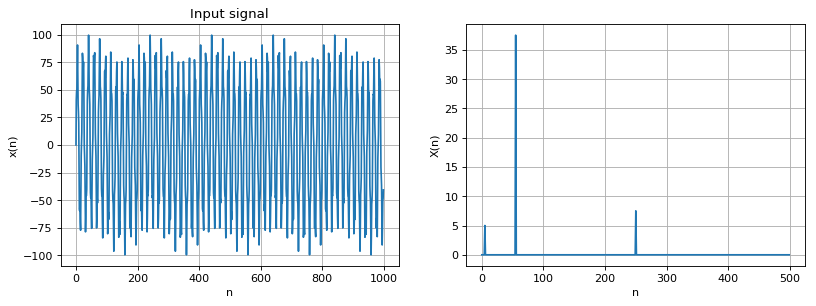

In [4]:
xn=readFromDat('php.dat',np.float32,NS)
NS=xn.shape[0]   # Modify NS in case there is less samples
Xn=np.array(fourierTransform(xn,NS)[:NS/2])

plt.figure(figsize=(12, 4), dpi=80)
plt.subplot(121)
plotVector(xn,"Input signal","n","x(n)")
plt.subplot(122)
plotVector(Xn,"","n","X(n)",X=fscaledS)
plt.show()

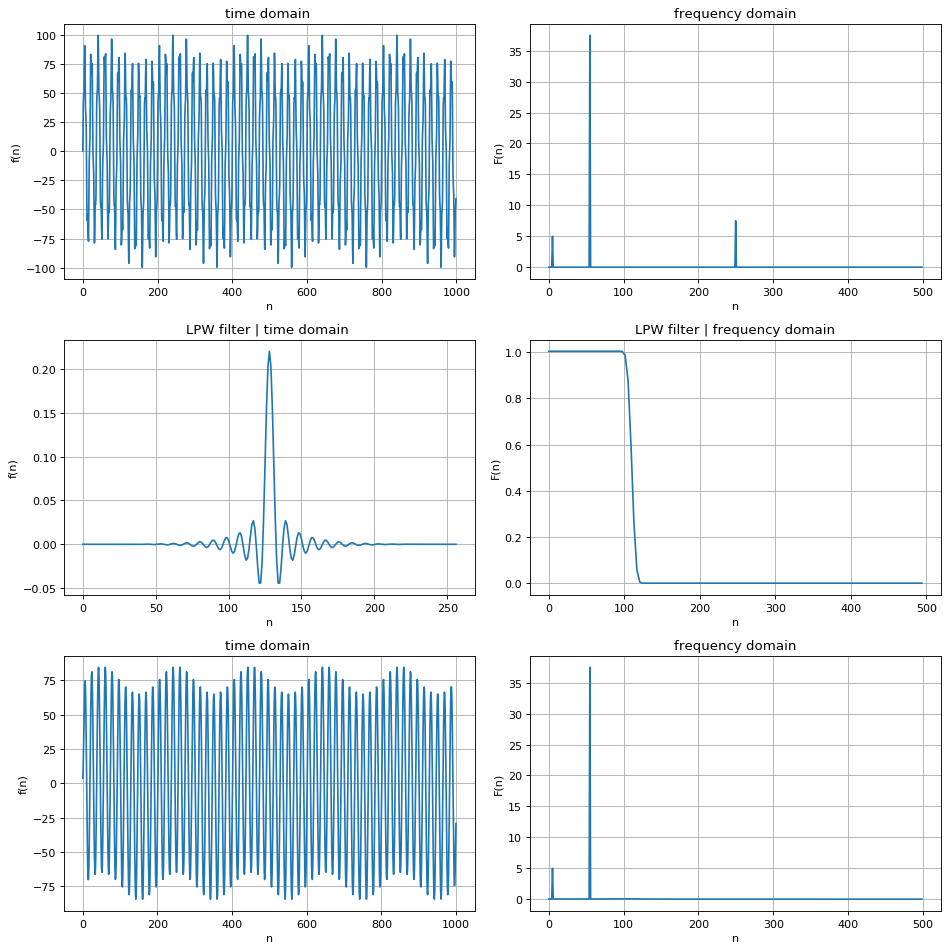

In [5]:
fout=110
lpw=lpf(fout,m,dt)
Cn_lpw=np.array(fourierTransform(lpw,NF)[:NF/2])
Cn_lpw=Cn_lpw*(NF+1)

yn_lpw=convolution(xn,lpw)[m:-m]
Yn_lpw=np.array(fourierTransform(yn_lpw,NS)[:NS/2])
plotHelper(xn,Xn,lpw,Cn_lpw,yn_lpw,Yn_lpw,dt,"LPW filter")

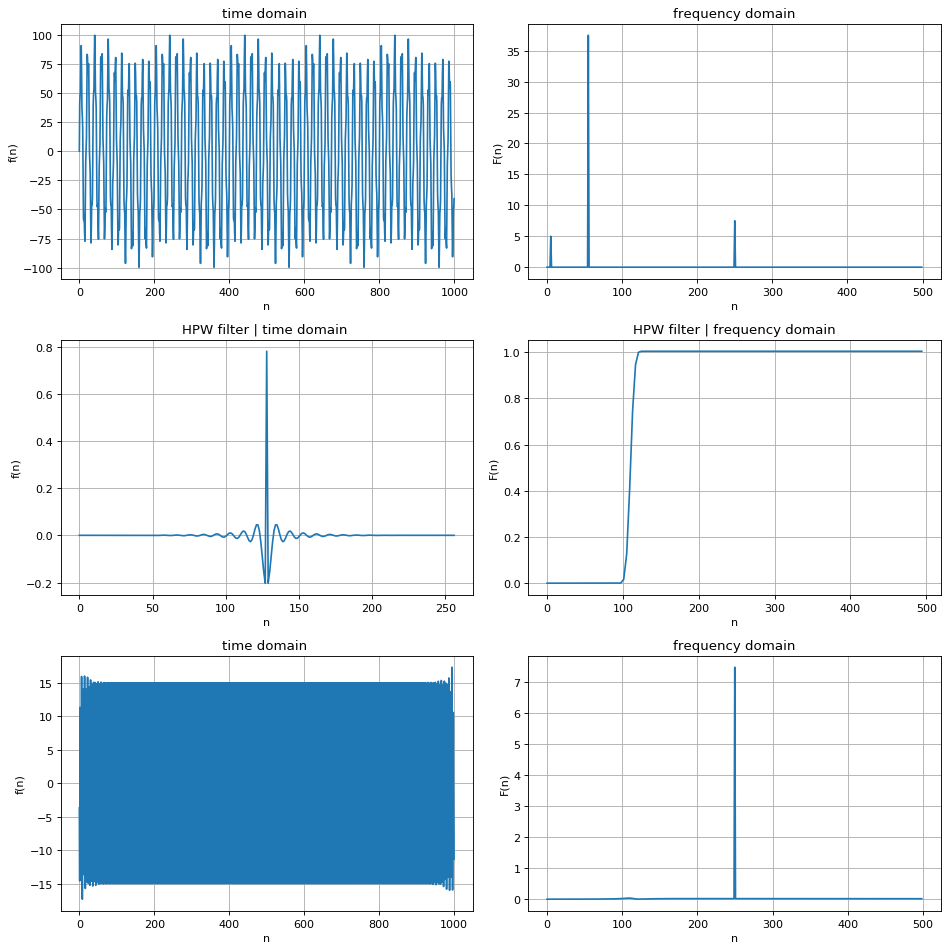

In [6]:
fc=110
hpw=hpf(fc,m,dt)
Cn_hpw=np.array(fourierTransform(hpw,NF)[:NF/2])
Cn_hpw=Cn_hpw*(NF+1)

yn_hpw=convolution(xn,hpw)[m:-m]
Yn_hpw=np.array(fourierTransform(yn_hpw,NS)[:NS/2])
plotHelper(xn,Xn,hpw,Cn_hpw,yn_hpw,Yn_hpw,dt,"HPW filter")

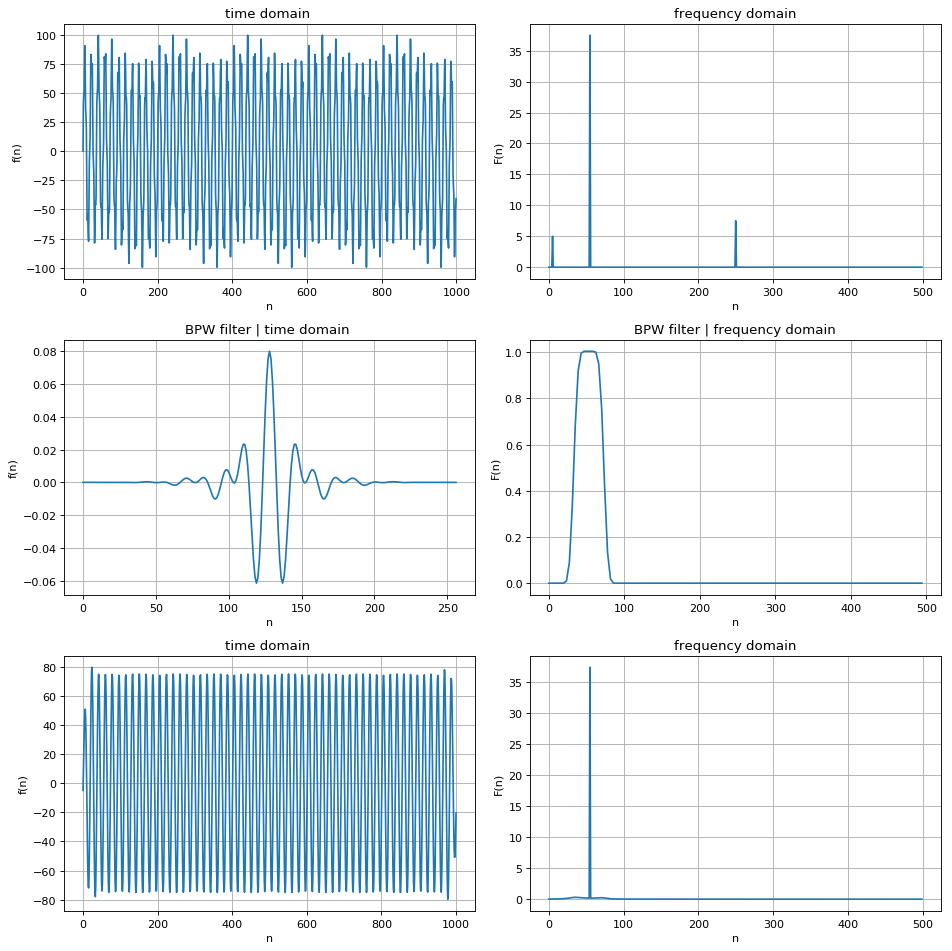

In [7]:
fc1=33
fc2=73
bpw=bpf(fc1,fc2,m,dt)
Cn_bpw=np.array(fourierTransform(bpw,NF)[:NF/2])
Cn_bpw=Cn_bpw*(NF+1)

yn_bpw=convolution(xn,bpw)[m:-m]
Yn_bpw=np.array(fourierTransform(yn_bpw,NS)[:NS/2])
plotHelper(xn,Xn,bpw,Cn_bpw,yn_bpw,Yn_bpw,dt,"BPW filter")

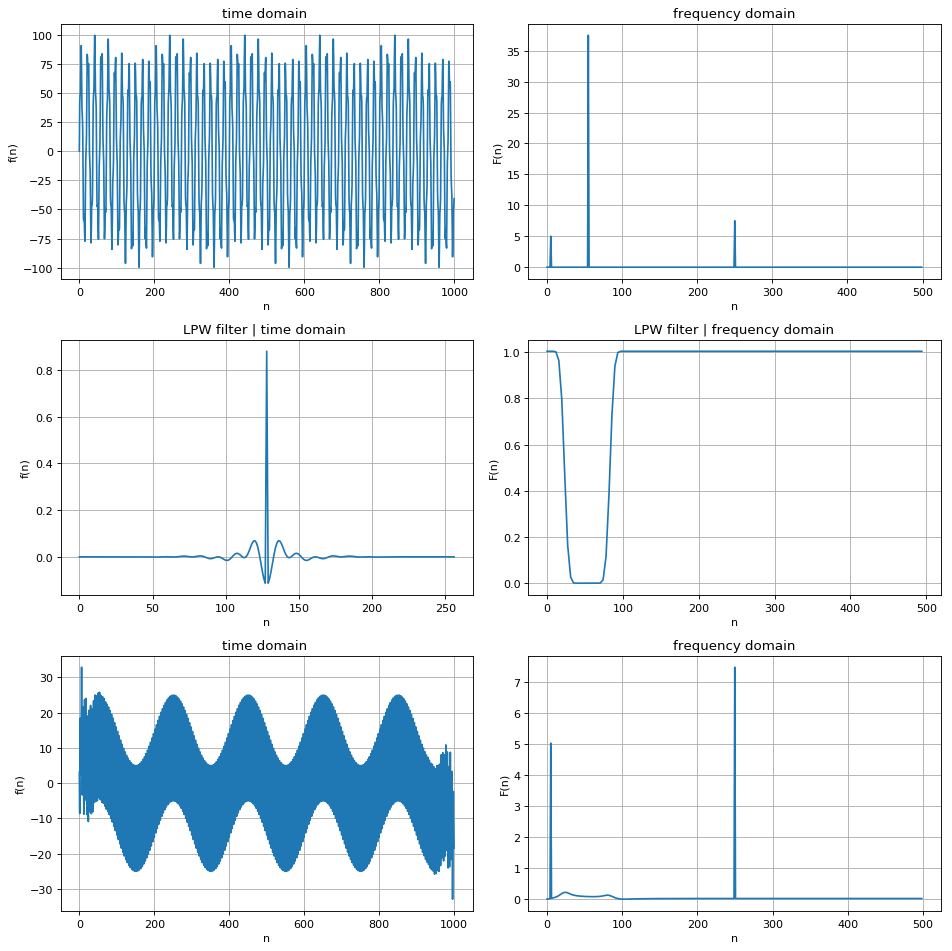

In [8]:
fc1=23
fc2=83
bsw=bsf(fc1,fc2,m,dt)
Cn_bsw=np.array(fourierTransform(bsw,NF)[:NF/2])
Cn_bsw=Cn_bsw*(NF+1)

yn_bsw=convolution(xn,bsw)[m:-m]
Yn_bsw=np.array(fourierTransform(yn_bsw,NS)[:NS/2])
plotHelper(xn,Xn,bsw,Cn_bsw,yn_bsw,Yn_bsw,dt,"LPW filter")